<a href="https://colab.research.google.com/github/Hanifahmed/wind_analysis_project/blob/main/notebooks/wind_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

filename = "/content/drive/MyDrive/H_ERA5_ECMW_T639_WON_NA---_Pecd_NUT0_S202401010000_E202412312300_CFR_TIM_01h_COM_noc_org_30_NA---_ReGrB_PhM04_PECD4.2_fv1.csv"

Mounted at /content/drive


In [ ]:
# ==============================
# Cell 1: Preprocessing
# ==============================
import pandas as pd

# Skip metadata rows and read CSV
df = pd.read_csv(filename, skiprows=52, header=0)

# Check first columns
print("Columns in CSV:", df.columns.tolist()[:20])

# Select Germany data
de_data = df[['Date','DE']].copy()

# Convert Date and DE to correct types
de_data['Date'] = pd.to_datetime(de_data['Date'])
de_data['DE'] = pd.to_numeric(de_data['DE'], errors='coerce')

# Set Date as index
de_data.set_index('Date', inplace=True)

# Verify
print("Shape of DE data:", de_data.shape)
print(de_data.head())

Columns in CSV: ['Date', 'AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'EG', 'EH', 'EL', 'ES', 'FI', 'FR', 'HR']
Shape of DE data: (8784, 1)
                           DE
Date                         
2024-01-01 00:00:00  0.539214
2024-01-01 01:00:00  0.538790
2024-01-01 02:00:00  0.550896
2024-01-01 03:00:00  0.558274
2024-01-01 04:00:00  0.549890


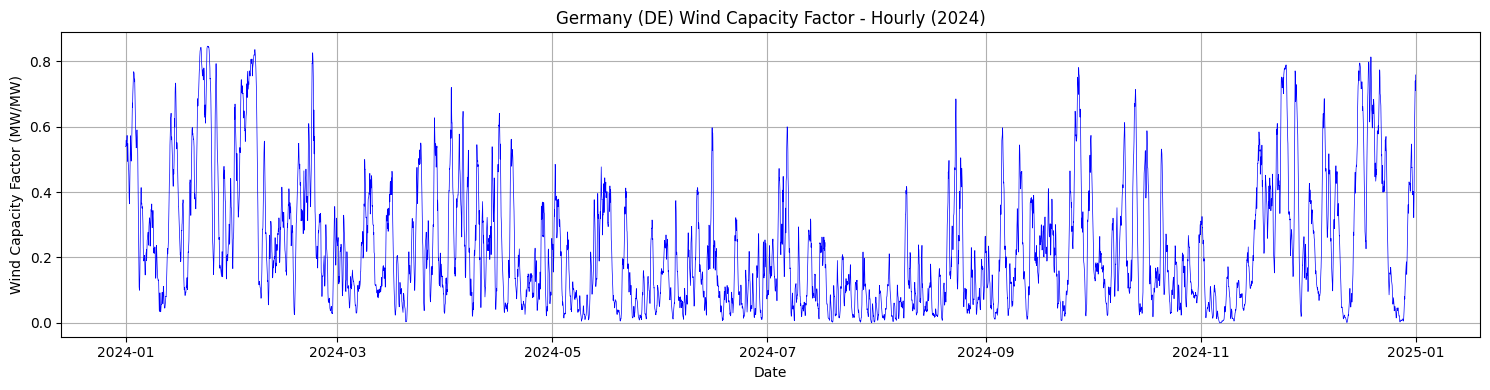

Time coverage: 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Missing values in DE: 0
Summary statistics for DE:
count    8784.000000
mean        0.228840
std         0.192717
min         0.000061
25%         0.079257
50%         0.168795
75%         0.332030
max         0.845906
Name: DE, dtype: float64


In [ ]:
# ==============================
# Cell 2: Hourly Wind CF Visualization
# ==============================
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(de_data.index, de_data['DE'], linewidth=0.5, color='blue')
plt.title("Germany (DE) Wind Capacity Factor - Hourly (2024)")
plt.xlabel("Date")
plt.ylabel("Wind Capacity Factor (MW/MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Basic stats
print("Time coverage:", de_data.index.min(), "to", de_data.index.max())
print("Missing values in DE:", de_data['DE'].isna().sum())
print("Summary statistics for DE:")
print(de_data['DE'].describe())

Daily shape: (366,)
Weekly shape: (54,)
Monthly shape: (12,)


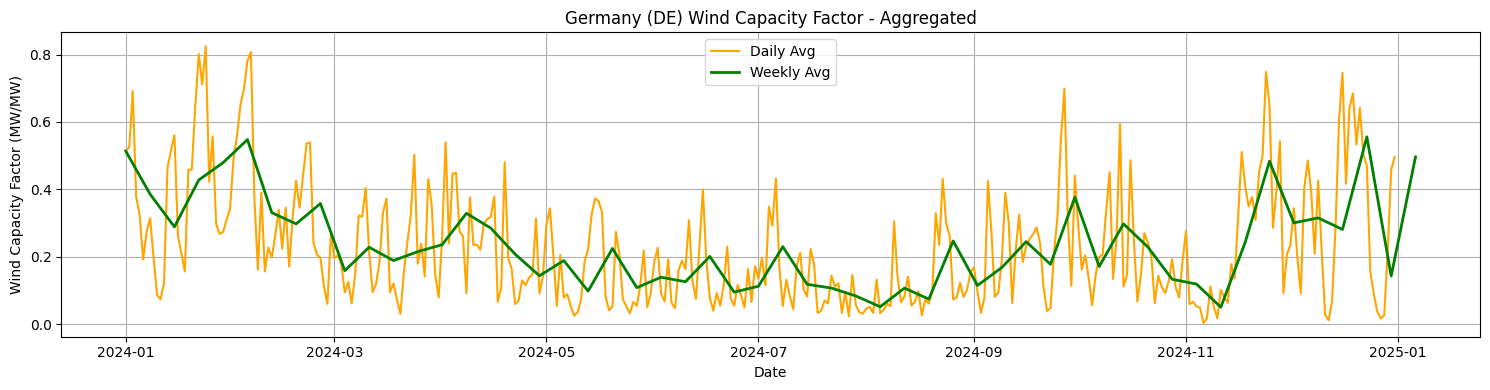

Daily Avg Summary:
 count    366.000000
mean       0.228840
std        0.176107
min        0.003719
25%        0.085775
50%        0.189253
75%        0.322130
max        0.824865
Name: DE, dtype: float64
Weekly Avg Summary:
 count    54.000000
mean      0.237604
std       0.133176
min       0.050204
25%       0.127697
50%       0.219836
75%       0.299813
max       0.555859
Name: DE, dtype: float64
Monthly Avg Summary:
 count    12.000000
mean      0.229403
std       0.091747
min       0.123586
25%       0.147191
50%       0.221859
75%       0.267100
max       0.394691
Name: DE, dtype: float64


In [ ]:
# ==============================
# Cell 3: Aggregated Wind CF
# ==============================
# Daily average
de_daily = de_data['DE'].resample('D').mean()

# Weekly average (Monday-Sunday)
de_weekly = de_data['DE'].resample('W-MON').mean()

# Monthly average
de_monthly = de_data['DE'].resample('ME').mean()

# Quick check shapes
print("Daily shape:", de_daily.shape)
print("Weekly shape:", de_weekly.shape)
print("Monthly shape:", de_monthly.shape)

# Plot aggregated values
plt.figure(figsize=(15,4))
plt.plot(de_daily.index, de_daily, color='orange', label='Daily Avg')
plt.plot(de_weekly.index, de_weekly, color='green', linewidth=2, label='Weekly Avg')
plt.title("Germany (DE) Wind Capacity Factor - Aggregated")
plt.xlabel("Date")
plt.ylabel("Wind Capacity Factor (MW/MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print("Daily Avg Summary:\n", de_daily.describe())
print("Weekly Avg Summary:\n", de_weekly.describe())
print("Monthly Avg Summary:\n", de_monthly.describe())

Number of low-wind hours: 876
Number of high-wind hours: 879


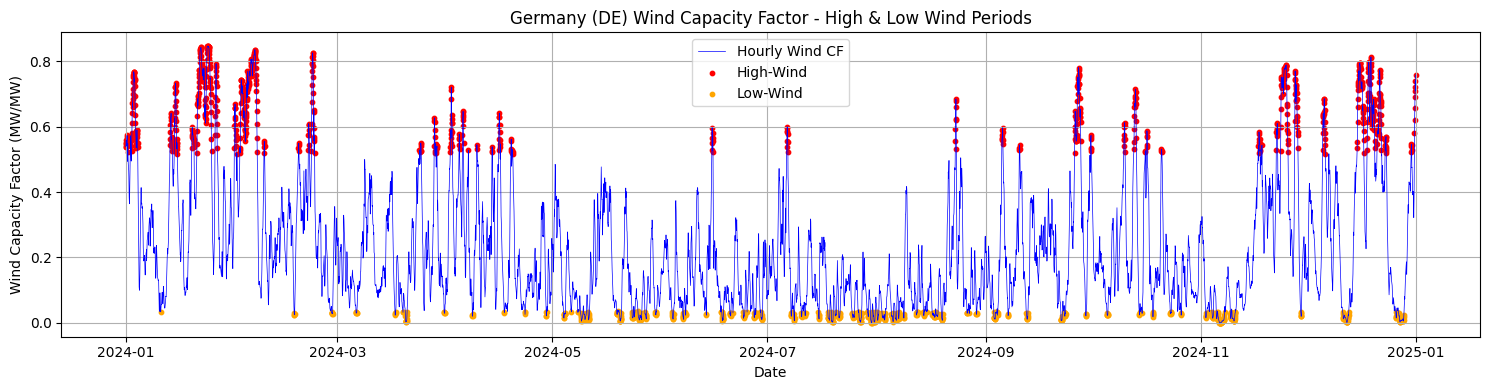

In [ ]:
# ==============================
# Cell 4: High/Low Wind Flags
# ==============================
low_threshold = 0.035
high_threshold = 0.517

# Create flags
de_data['Low_Wind'] = de_data['DE'] <= low_threshold
de_data['High_Wind'] = de_data['DE'] >= high_threshold

# Quick summary
print("Number of low-wind hours:", de_data['Low_Wind'].sum())
print("Number of high-wind hours:", de_data['High_Wind'].sum())

# Plot with flags
plt.figure(figsize=(15,4))
plt.plot(de_data.index, de_data['DE'], color='blue', linewidth=0.5, label='Hourly Wind CF')
plt.scatter(de_data.index[de_data['High_Wind']], de_data['DE'][de_data['High_Wind']],
            color='red', s=10, label='High-Wind')
plt.scatter(de_data.index[de_data['Low_Wind']], de_data['DE'][de_data['Low_Wind']],
            color='orange', s=10, label='Low-Wind')
plt.title("Germany (DE) Wind Capacity Factor - High & Low Wind Periods")
plt.xlabel("Date")
plt.ylabel("Wind Capacity Factor (MW/MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ==============================
# Cell 5: Export Preprocessed Germany Data
# ==============================
output_file = "/content/DE_Wind_Preprocessed_2024.csv"

# Export to CSV (index=True to keep Date column)
de_data.to_csv(output_file, index=True)

print(f"Preprocessed data exported to: {output_file}")

Preprocessed data exported to: /content/DE_Wind_Preprocessed_2024.csv


Germany Wind Capacity Factor (DE) - Basic Statistics
count    8784.000000
mean        0.228840
std         0.192717
min         0.000061
25%         0.079257
50%         0.168795
75%         0.332030
max         0.845906
Name: DE, dtype: float64


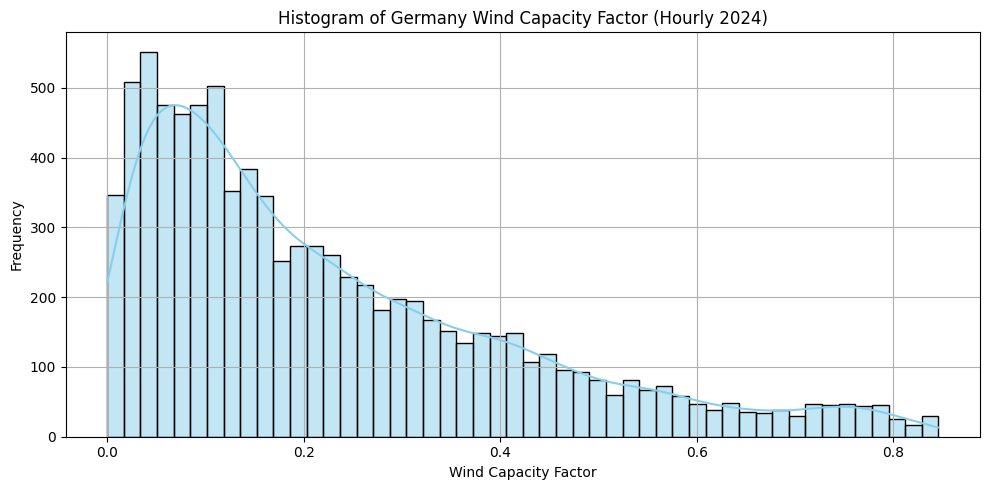

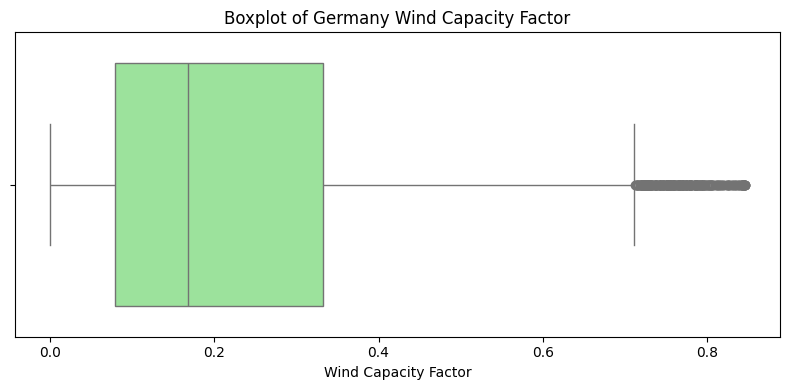

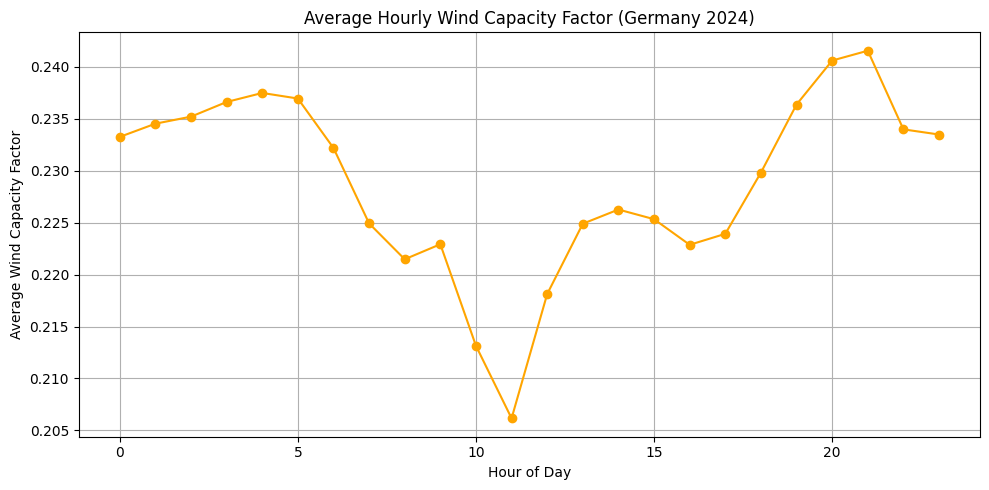

/tmp/ipython-input-1559616406.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  de_monthly = de_data['DE'].resample('M').mean()


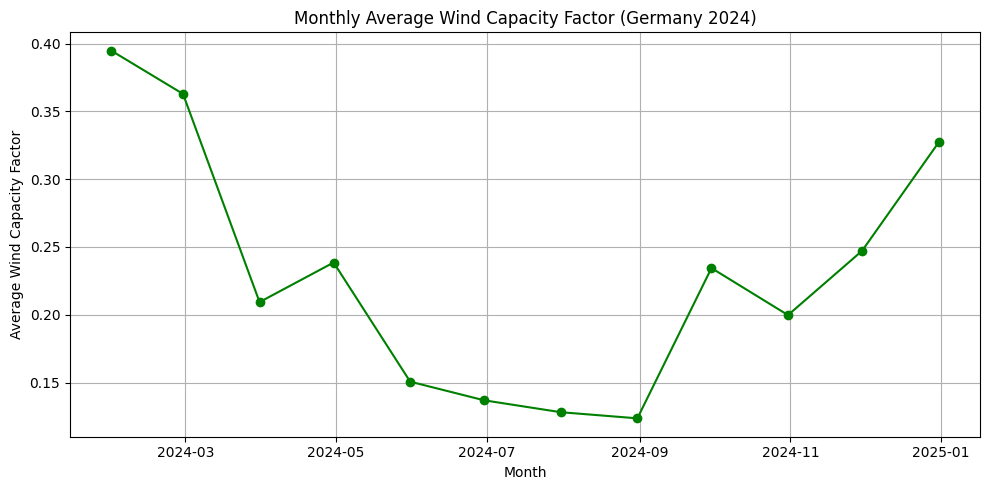

In [ ]:
# ==============================
# Cell 6: Descriptive Statistics & Distribution Analysis
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Basic statistics ---
print("Germany Wind Capacity Factor (DE) - Basic Statistics")
print(de_data['DE'].describe())

# --- 2. Histogram of hourly wind capacity factor ---
plt.figure(figsize=(10,5))
sns.histplot(de_data['DE'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Germany Wind Capacity Factor (Hourly 2024)")
plt.xlabel("Wind Capacity Factor")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Boxplot to check outliers ---
plt.figure(figsize=(8,4))
sns.boxplot(x=de_data['DE'], color='lightgreen')
plt.title("Boxplot of Germany Wind Capacity Factor")
plt.xlabel("Wind Capacity Factor")
plt.tight_layout()
plt.show()

# --- 4. Diurnal (hourly) pattern ---
de_hourly = de_data['DE'].groupby(de_data.index.hour).mean()
plt.figure(figsize=(10,5))
plt.plot(de_hourly.index, de_hourly.values, marker='o', color='orange')
plt.title("Average Hourly Wind Capacity Factor (Germany 2024)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Monthly pattern ---
de_monthly = de_data['DE'].resample('M').mean()
plt.figure(figsize=(10,5))
plt.plot(de_monthly.index, de_monthly.values, marker='o', color='green')
plt.title("Monthly Average Wind Capacity Factor (Germany 2024)")
plt.xlabel("Month")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

Number of low-wind hours: 876
Number of high-wind hours: 879
Max consecutive low-wind hours: 47
Max consecutive high-wind hours: 119


/tmp/ipython-input-3783935851.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_periods = de_data.groupby('Low_Wind_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
/tmp/ipython-input-3783935851.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_periods = de_data.groupby('High_Wind_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)


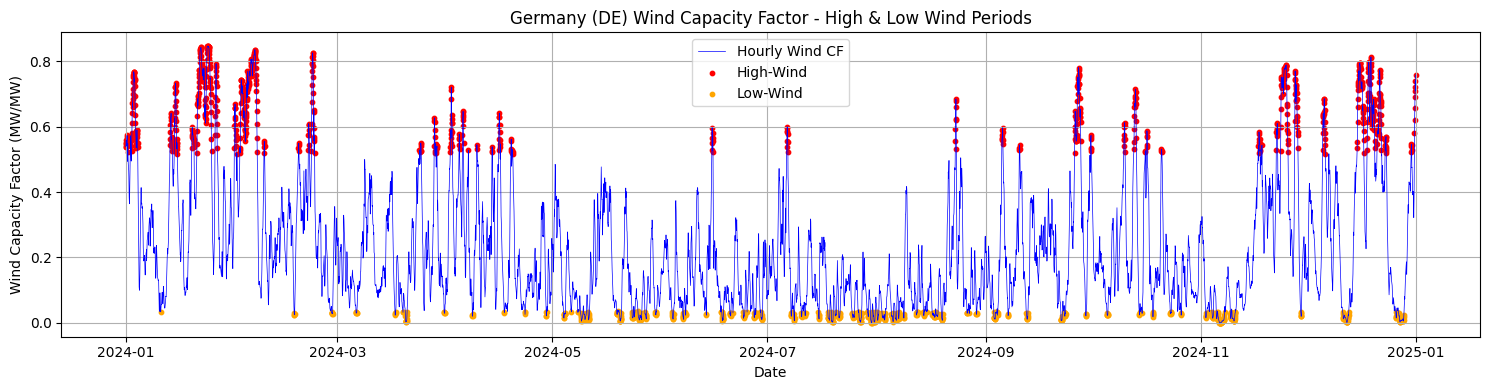

In [ ]:
# ==============================
# Cell 7: Extreme Wind Analysis
# ==============================

# Thresholds (already used before)
low_threshold = 0.035
high_threshold = 0.517

# Flags for extreme conditions
de_data['Low_Wind'] = de_data['DE'] <= low_threshold
de_data['High_Wind'] = de_data['DE'] >= high_threshold

# Count of extreme hours
num_low = de_data['Low_Wind'].sum()
num_high = de_data['High_Wind'].sum()

print(f"Number of low-wind hours: {num_low}")
print(f"Number of high-wind hours: {num_high}")

# Consecutive low-wind periods
de_data['Low_Wind_Group'] = (de_data['Low_Wind'] != de_data['Low_Wind'].shift()).cumsum()
low_periods = de_data.groupby('Low_Wind_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
low_periods = low_periods[low_periods > 0]

# Consecutive high-wind periods
de_data['High_Wind_Group'] = (de_data['High_Wind'] != de_data['High_Wind'].shift()).cumsum()
high_periods = de_data.groupby('High_Wind_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)
high_periods = high_periods[high_periods > 0]

print(f"Max consecutive low-wind hours: {low_periods.max()}")
print(f"Max consecutive high-wind hours: {high_periods.max()}")

# Plot extreme periods
plt.figure(figsize=(15,4))
plt.plot(de_data.index, de_data['DE'], color='blue', linewidth=0.5, label='Hourly Wind CF')
plt.scatter(de_data.index[de_data['High_Wind']], de_data['DE'][de_data['High_Wind']],
            color='red', s=10, label='High-Wind')
plt.scatter(de_data.index[de_data['Low_Wind']], de_data['DE'][de_data['Low_Wind']],
            color='orange', s=10, label='Low-Wind')
plt.title("Germany (DE) Wind Capacity Factor - High & Low Wind Periods")
plt.xlabel("Date")
plt.ylabel("Wind Capacity Factor (MW/MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Monthly low/high wind hours:
       Low_Wind  High_Wind
Month                     
1             1        238
2            11        167
3            31         24
4            13         54
5           151          0
6            84          8
7           149          9
8           146          8
9            64         62
10           29         39
11          112         97
12           85        173


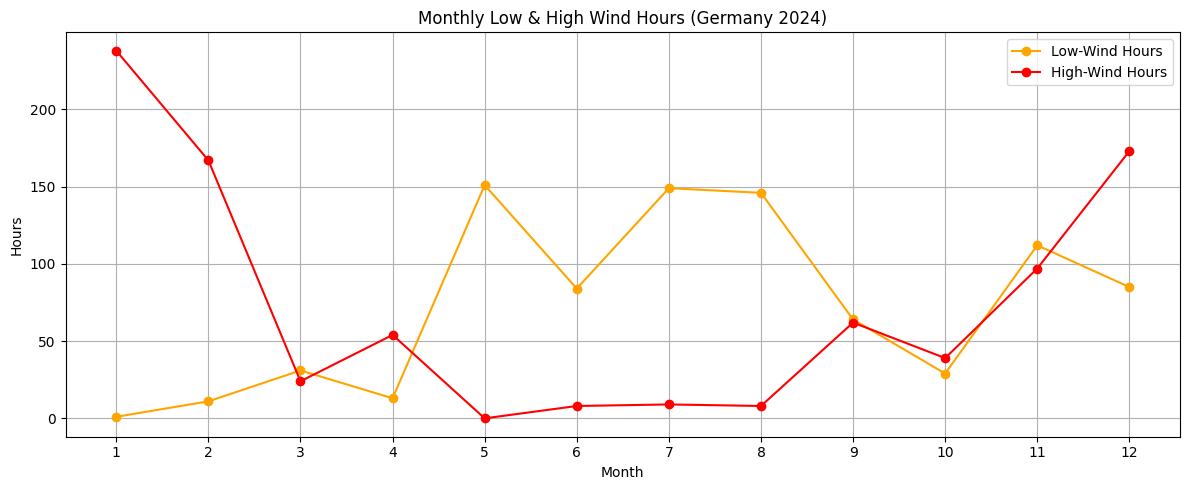

In [ ]:
# ==============================
# Cell 8: Seasonal & Monthly Extreme Wind Analysis
# ==============================

# Add month column
de_data['Month'] = de_data.index.month

# Monthly low/high wind counts
monthly_stats = de_data.groupby('Month').agg({
    'Low_Wind': 'sum',
    'High_Wind': 'sum'
})

print("Monthly low/high wind hours:")
print(monthly_stats)

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_stats.index, monthly_stats['Low_Wind'], marker='o', color='orange', label='Low-Wind Hours')
plt.plot(monthly_stats.index, monthly_stats['High_Wind'], marker='o', color='red', label='High-Wind Hours')
plt.title("Monthly Low & High Wind Hours (Germany 2024)")
plt.xlabel("Month")
plt.ylabel("Hours")
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

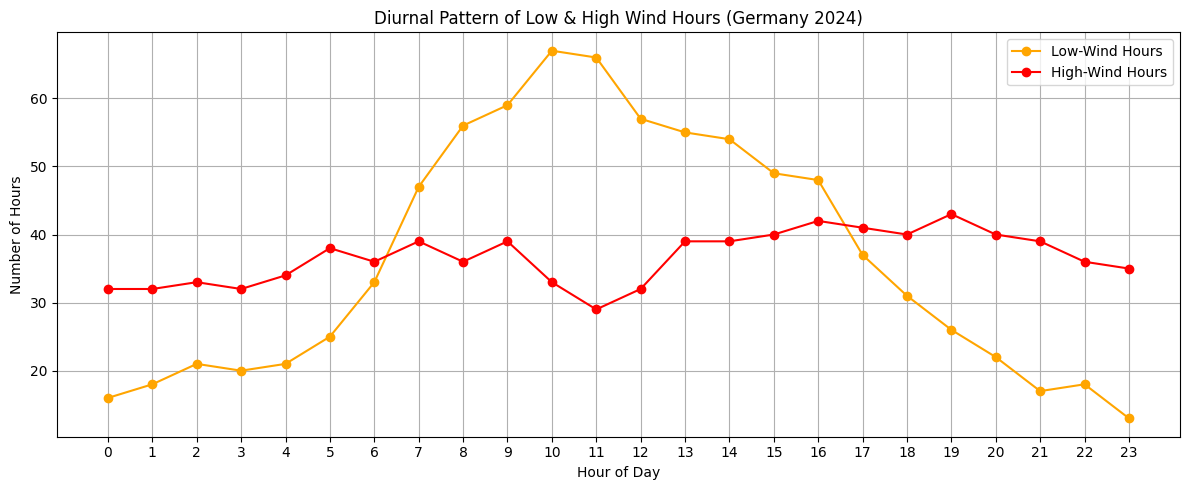

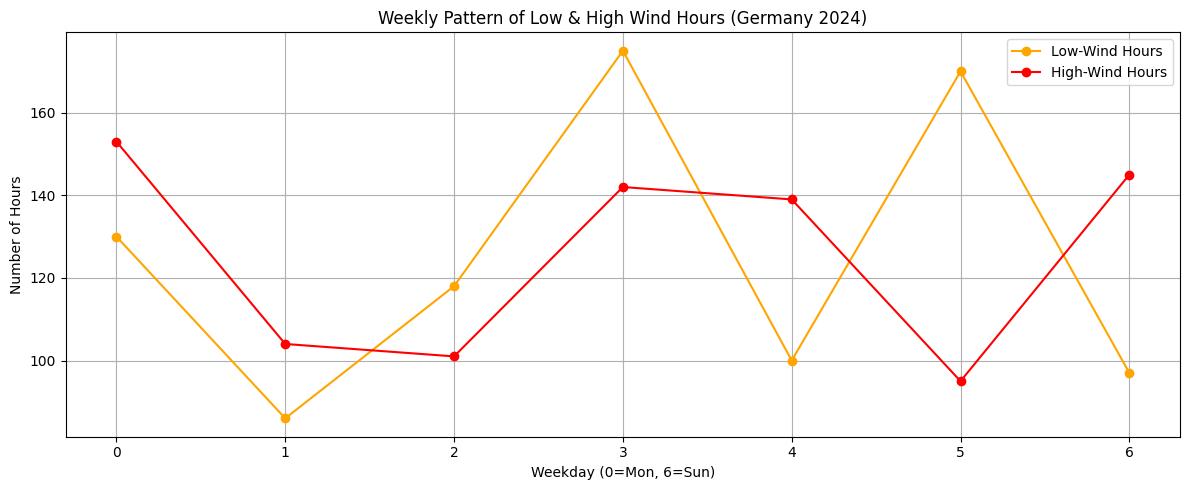

In [ ]:
# ==============================
# Cell 9: Diurnal & Weekly Extreme Wind Patterns
# ==============================

# --- 1. Hourly (diurnal) pattern ---
hourly_low = de_data.groupby(de_data.index.hour)['Low_Wind'].sum()
hourly_high = de_data.groupby(de_data.index.hour)['High_Wind'].sum()

plt.figure(figsize=(12,5))
plt.plot(hourly_low.index, hourly_low.values, marker='o', color='orange', label='Low-Wind Hours')
plt.plot(hourly_high.index, hourly_high.values, marker='o', color='red', label='High-Wind Hours')
plt.title("Diurnal Pattern of Low & High Wind Hours (Germany 2024)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Hours")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Weekly pattern ---
de_data['Weekday'] = de_data.index.weekday  # Monday=0
weekday_low = de_data.groupby('Weekday')['Low_Wind'].sum()
weekday_high = de_data.groupby('Weekday')['High_Wind'].sum()

plt.figure(figsize=(12,5))
plt.plot(weekday_low.index, weekday_low.values, marker='o', color='orange', label='Low-Wind Hours')
plt.plot(weekday_high.index, weekday_high.values, marker='o', color='red', label='High-Wind Hours')
plt.title("Weekly Pattern of Low & High Wind Hours (Germany 2024)")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Number of Hours")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

# ==============================
# Cell 10: Wind Reliability Analysis
# ==============================

# Define thresholds (adjust as needed)
reliability_thresholds = [0.1, 0.2, 0.3, 0.4]

results = {}
total_hours = len(de_data)

for thr in reliability_thresholds:
    above = (de_data['DE'] >= thr).sum()
    below = (de_data['DE'] < thr).sum()

    results[thr] = {
        "Probability_Above": above / total_hours,
        "Probability_Below": below / total_hours
    }

# Print results
for thr, vals in results.items():
    print(f"\nThreshold {thr:.2f}:")
    print(f"  P(Wind >= {thr:.2f}) = {vals['Probability_Above']:.2%}")
    print(f"  P(Wind <  {thr:.2f}) = {vals['Probability_Below']:.2%}")

# Max consecutive hours below reliability thresholds
for thr in reliability_thresholds:
    condition = de_data['DE'] < thr
    groups = (condition != condition.shift()).cumsum()
    consecutive = de_data.groupby(groups).apply(lambda x: len(x) if x['DE'].iloc[0] < thr else 0)
    max_consec = consecutive.max()

    print(f"Max consecutive hours with wind < {thr:.2f}: {max_consec}")


Threshold 0.10:
  P(Wind >= 0.10) = 68.33%
  P(Wind <  0.10) = 31.67%

Threshold 0.20:
  P(Wind >= 0.20) = 44.49%
  P(Wind <  0.20) = 55.51%

Threshold 0.30:
  P(Wind >= 0.30) = 28.94%
  P(Wind <  0.30) = 71.06%

Threshold 0.40:
  P(Wind >= 0.40) = 18.34%
  P(Wind <  0.40) = 81.66%
Max consecutive hours with wind < 0.10: 109
Max consecutive hours with wind < 0.20: 295
Max consecutive hours with wind < 0.30: 642
Max consecutive hours with wind < 0.40: 800



Estimated Annual Capacity Factor: 22.88%


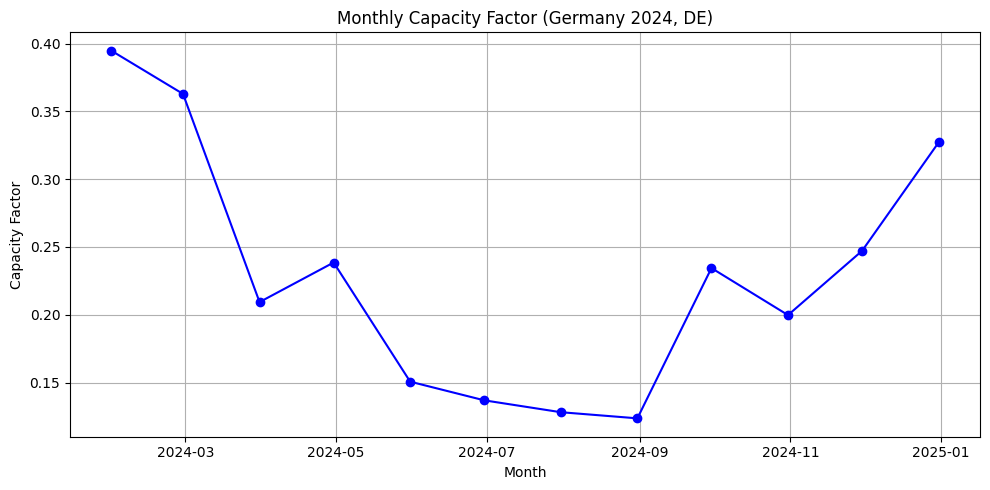

Estimated Annual Energy Production: 6,030 MWh


In [ ]:

# ==============================
# Cell 11: Capacity Factor & Power Output (Direct from DE)
# ==============================

import matplotlib.pyplot as plt

# Rated turbine capacity (example: 3 MW)
P_rated = 3000  # kW

# --- Power output from DE ---
df = de_data.copy()
df['Power_kW'] = df['DE'] * P_rated

# --- Annual capacity factor ---
CF = df['DE'].mean()
print(f"\nEstimated Annual Capacity Factor: {CF:.2%}")

# --- Monthly capacity factor ---
monthly_cf = df['DE'].resample('ME').mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_cf.index, monthly_cf.values, marker='o', color='blue')
plt.title("Monthly Capacity Factor (Germany 2024, DE)")
plt.xlabel("Month")
plt.ylabel("Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Optional: Annual Energy Production ---
AEP = df['Power_kW'].sum() / 1000  # in MWh
print(f"Estimated Annual Energy Production: {AEP:,.0f} MWh")

In [ ]:

import pandas as pd

# Replace with your actual CSV path in Colab
filename = "/content/drive/MyDrive/H_ERA5_ECMW_T639_WON_NA---_Pecd_NUT0_S202401010000_E202412312300_CFR_TIM_01h_COM_noc_org_30_NA---_ReGrB_PhM04_PECD4.2_fv1.csv"

# Skip metadata rows and read CSV
df_full = pd.read_csv(filename, skiprows=52, header=0)


# Check columns
print(df_full.columns.tolist()[:20])

# --- Step 1: Select Denmark data ---
dk_data = df_full[['Date','DK']].copy()

# --- Step 2: Convert columns to correct types ---
# Date to datetime
dk_data['Date'] = pd.to_datetime(dk_data['Date'])

# DK column to numeric (coerce any non-numeric / missing values)
dk_data['DK'] = pd.to_numeric(dk_data['DK'], errors='coerce')

# --- Step 3: Set Date as index ---
dk_data.set_index('Date', inplace=True)

# --- Step 4: Verify ---
print("Shape of DK data:", dk_data.shape)
print(dk_data.head())

['Date', 'AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'EG', 'EH', 'EL', 'ES', 'FI', 'FR', 'HR']
Shape of DK data: (8784, 1)
                           DK
Date                         
2024-01-01 00:00:00  0.297519
2024-01-01 01:00:00  0.272151
2024-01-01 02:00:00  0.269957
2024-01-01 03:00:00  0.277264
2024-01-01 04:00:00  0.296639


Denmark Wind Capacity Factor (DK) - Basic Statistics
count    8784.000000
mean        0.255421
std         0.232754
min         0.000035
25%         0.065011
50%         0.180721
75%         0.382665
max         0.947047
Name: DK, dtype: float64


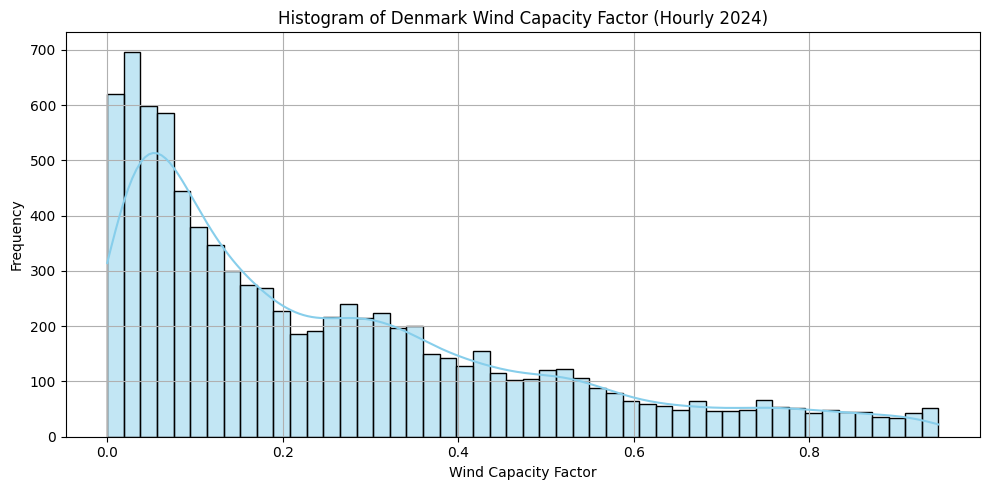

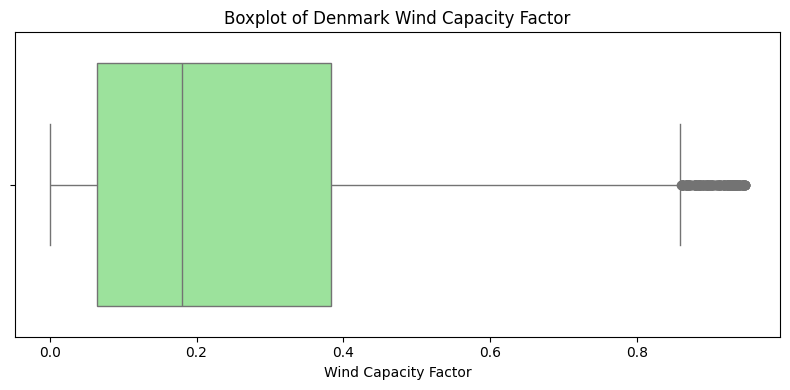

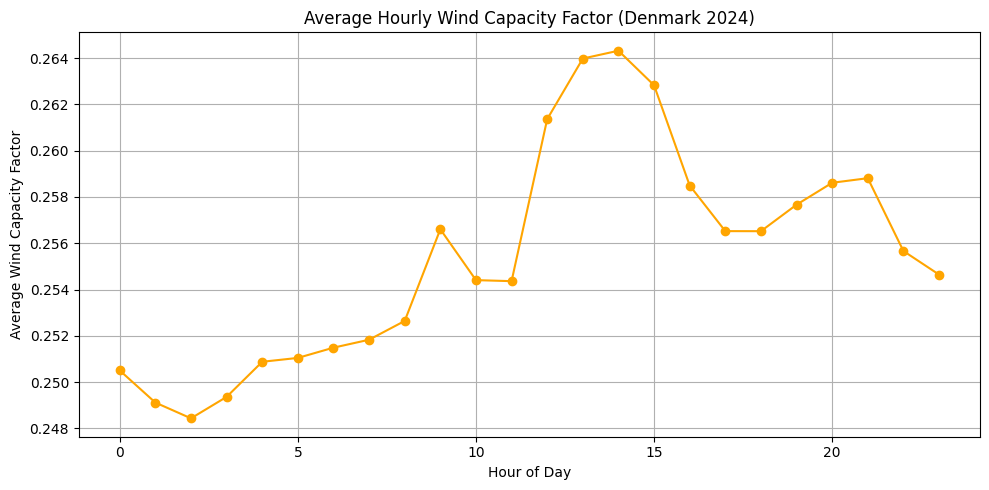

/tmp/ipython-input-1349468812.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dk_monthly = dk_data['DK'].resample('M').mean()


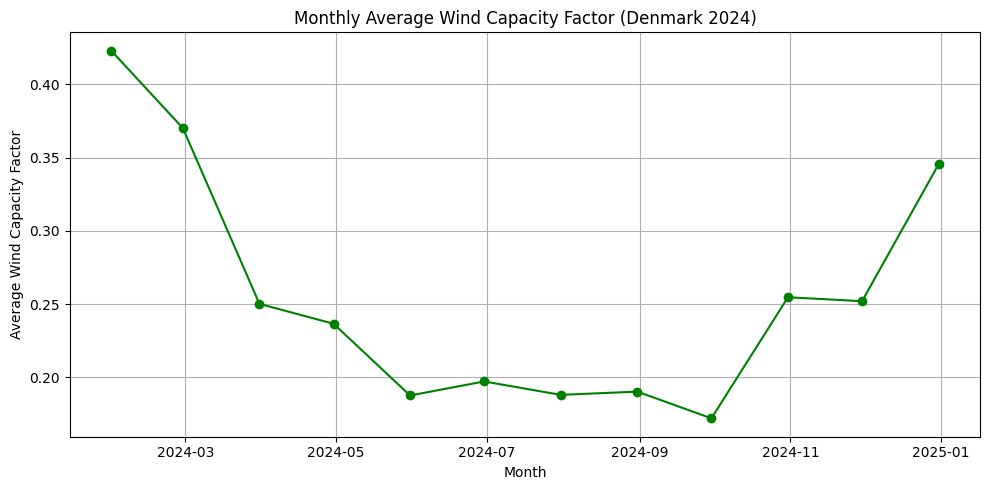

In [ ]:

# ==============================
# Cell 11: Denmark - Descriptive Statistics & Distribution
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Basic statistics ---
print("Denmark Wind Capacity Factor (DK) - Basic Statistics")
print(dk_data['DK'].describe())

# --- 2. Histogram ---
plt.figure(figsize=(10,5))
sns.histplot(dk_data['DK'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Denmark Wind Capacity Factor (Hourly 2024)")
plt.xlabel("Wind Capacity Factor")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Boxplot ---
plt.figure(figsize=(8,4))
sns.boxplot(x=dk_data['DK'], color='lightgreen')
plt.title("Boxplot of Denmark Wind Capacity Factor")
plt.xlabel("Wind Capacity Factor")
plt.tight_layout()
plt.show()

# --- 4. Average diurnal (hourly) pattern ---
dk_hourly = dk_data['DK'].groupby(dk_data.index.hour).mean()
plt.figure(figsize=(10,5))
plt.plot(dk_hourly.index, dk_hourly.values, marker='o', color='orange')
plt.title("Average Hourly Wind Capacity Factor (Denmark 2024)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Monthly pattern ---
dk_monthly = dk_data['DK'].resample('M').mean()
plt.figure(figsize=(10,5))
plt.plot(dk_monthly.index, dk_monthly.values, marker='o', color='green')
plt.title("Monthly Average Wind Capacity Factor (Denmark 2024)")
plt.xlabel("Month")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd

# Replace with your actual CSV path in Colab
filename = "/content/drive/MyDrive/H_ERA5_ECMW_T639_WON_NA---_Pecd_NUT0_S202401010000_E202412312300_CFR_TIM_01h_COM_noc_org_30_NA---_ReGrB_PhM04_PECD4.2_fv1.csv"

# Skip metadata rows and read CSV
df_NL = pd.read_csv(filename, skiprows=52, header=0)


# Check columns
print(df_NL.columns.tolist()[:20])

# --- Step 1: Select Denmark data ---
nl_data = df_NL[['Date','NL']].copy()

# --- Step 2: Convert columns to correct types ---
# Date to datetime
nl_data['Date'] = pd.to_datetime(nl_data['Date'])

# DK column to numeric (coerce any non-numeric / missing values)
nl_data['DK'] = pd.to_numeric(nl_data['NL'], errors='coerce')

# --- Step 3: Set Date as index ---
nl_data.set_index('Date', inplace=True)

# --- Step 4: Verify ---
print("Shape of  data:", nl_data.shape)
print(nl_data.head())

['Date', 'AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'EG', 'EH', 'EL', 'ES', 'FI', 'FR', 'HR']
Shape of  data: (8784, 2)
                           NL        DK
Date                                   
2024-01-01 00:00:00  0.819008  0.819008
2024-01-01 01:00:00  0.819240  0.819240
2024-01-01 02:00:00  0.827345  0.827345
2024-01-01 03:00:00  0.821338  0.821338
2024-01-01 04:00:00  0.789678  0.789678


Netherlands Wind Capacity Factor (NL) - Basic Statistics
count    8784.000000
mean        0.263304
std         0.239892
min         0.000000
25%         0.066839
50%         0.185084
75%         0.404769
max         0.898548
Name: NL, dtype: float64


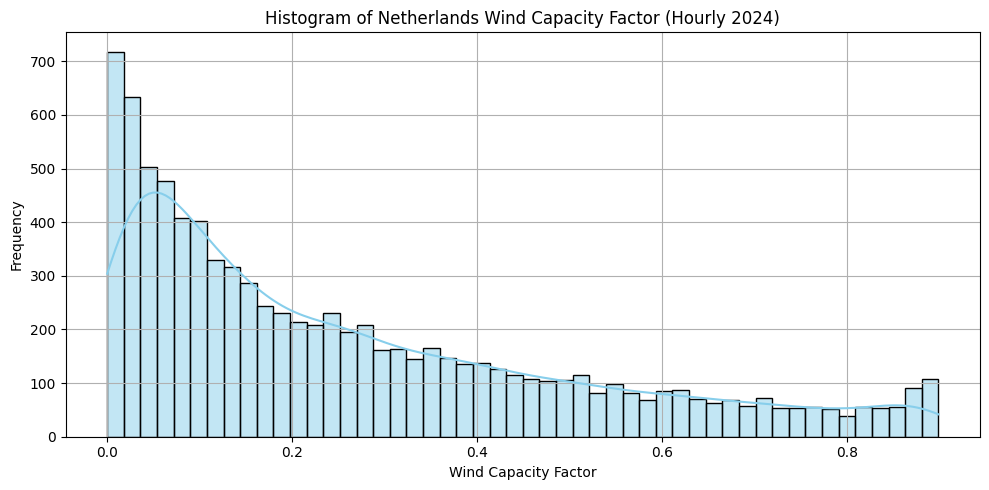

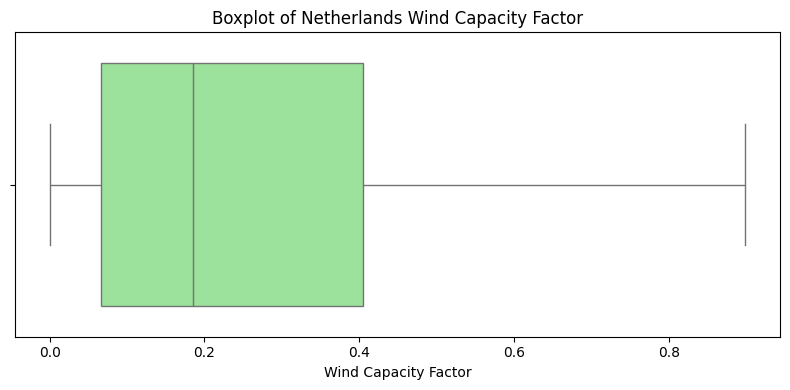

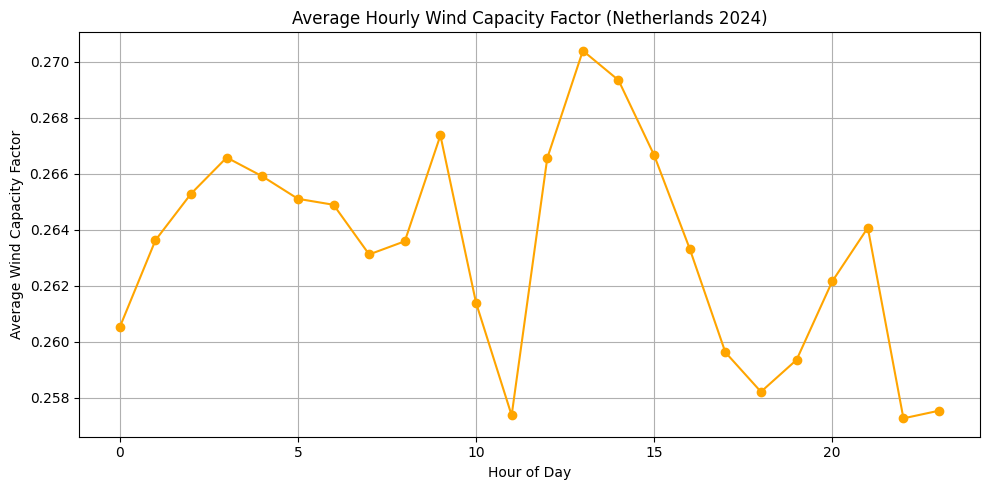

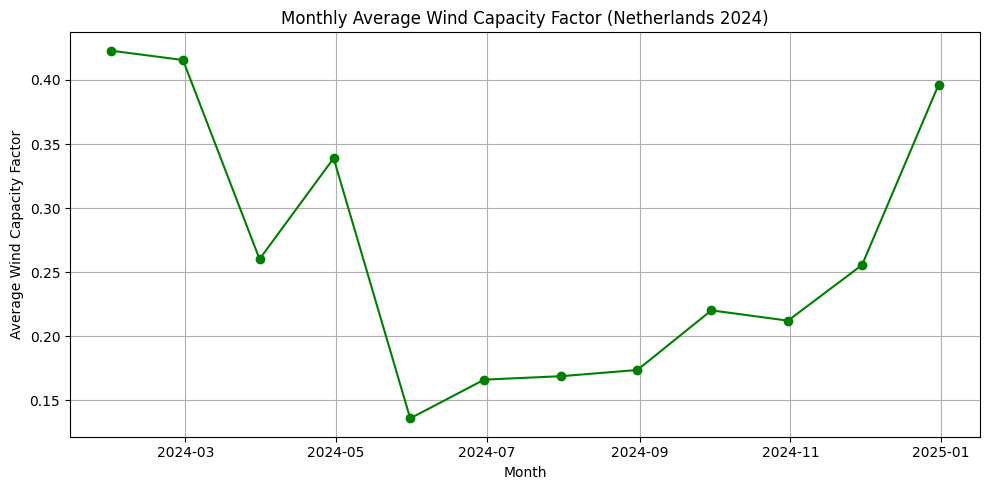

In [ ]:
# ==============================
# Cell 12: Netherlands - Descriptive Statistics & Distribution
# ==============================

# --- 1. Basic statistics ---
print("Netherlands Wind Capacity Factor (NL) - Basic Statistics")
print(nl_data['NL'].describe())

# --- 2. Histogram ---
plt.figure(figsize=(10,5))
sns.histplot(nl_data['NL'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Netherlands Wind Capacity Factor (Hourly 2024)")
plt.xlabel("Wind Capacity Factor")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Boxplot ---
plt.figure(figsize=(8,4))
sns.boxplot(x=nl_data['NL'], color='lightgreen')
plt.title("Boxplot of Netherlands Wind Capacity Factor")
plt.xlabel("Wind Capacity Factor")
plt.tight_layout()
plt.show()

# --- 4. Average diurnal (hourly) pattern ---
nl_hourly = nl_data['NL'].groupby(nl_data.index.hour).mean()
plt.figure(figsize=(10,5))
plt.plot(nl_hourly.index, nl_hourly.values, marker='o', color='orange')
plt.title("Average Hourly Wind Capacity Factor (Netherlands 2024)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Monthly pattern ---
nl_monthly = nl_data['NL'].resample('ME').mean()
plt.figure(figsize=(10,5))
plt.plot(nl_monthly.index, nl_monthly.values, marker='o', color='green')
plt.title("Monthly Average Wind Capacity Factor (Netherlands 2024)")
plt.xlabel("Month")
plt.ylabel("Average Wind Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ==============================
# Cell 13: Extreme Wind & Reliability Analysis - Germany, Denmark, Netherlands
# ==============================

# Define thresholds (same as before, can adjust if needed)
low_threshold = 0.035   # below this is considered low-wind
high_threshold = 0.517  # above this is considered high-wind

# Store results in a dictionary
extreme_wind_summary = {}

for country, data in zip(['DE','DK','NL'], [de_data, dk_data, nl_data]):

    # Flags
    data['Low_Wind'] = data[country] <= low_threshold
    data['High_Wind'] = data[country] >= high_threshold

    # Counts
    num_low = data['Low_Wind'].sum()
    num_high = data['High_Wind'].sum()

    # Max consecutive periods
    data['Low_Group'] = (data['Low_Wind'] != data['Low_Wind'].shift()).cumsum()
    low_periods = data.groupby('Low_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
    max_low_consec = low_periods[low_periods>0].max()

    data['High_Group'] = (data['High_Wind'] != data['High_Wind'].shift()).cumsum()
    high_periods = data.groupby('High_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)
    max_high_consec = high_periods[high_periods>0].max()

    # Store results
    extreme_wind_summary[country] = {
        "Low_Wind_Hours": num_low,
        "High_Wind_Hours": num_high,
        "Max_Consec_Low": max_low_consec,
        "Max_Consec_High": max_high_consec
    }

# Print results in a clean table format
import pandas as pd

extreme_wind_df = pd.DataFrame(extreme_wind_summary).fillna(0).T
print(extreme_wind_df)

/tmp/ipython-input-3161464713.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_periods = data.groupby('Low_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
/tmp/ipython-input-3161464713.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_periods = data.groupby('High_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)
/tmp/ipython-input-3161464713.py:24: DeprecationW

    Low_Wind_Hours  High_Wind_Hours  Max_Consec_Low  Max_Consec_High
DE             876              879              47              119
DK            1220             1322              63              110
NL            1317             1478              62               71


/tmp/ipython-input-3161464713.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_periods = data.groupby('High_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)


/tmp/ipython-input-3328981586.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  low_periods = data.groupby('Low_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
/tmp/ipython-input-3328981586.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_periods = data.groupby('High_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)
/tmp/ipython-input-3328981586.py:30: DeprecationW

Extreme Wind Summary (DE, DK, NL):
    Low_Wind_Hours  High_Wind_Hours  Max_Consec_Low  Max_Consec_High
DE             876              879              47              119
DK            1220             1322              63              110
NL            1317             1478              62               71


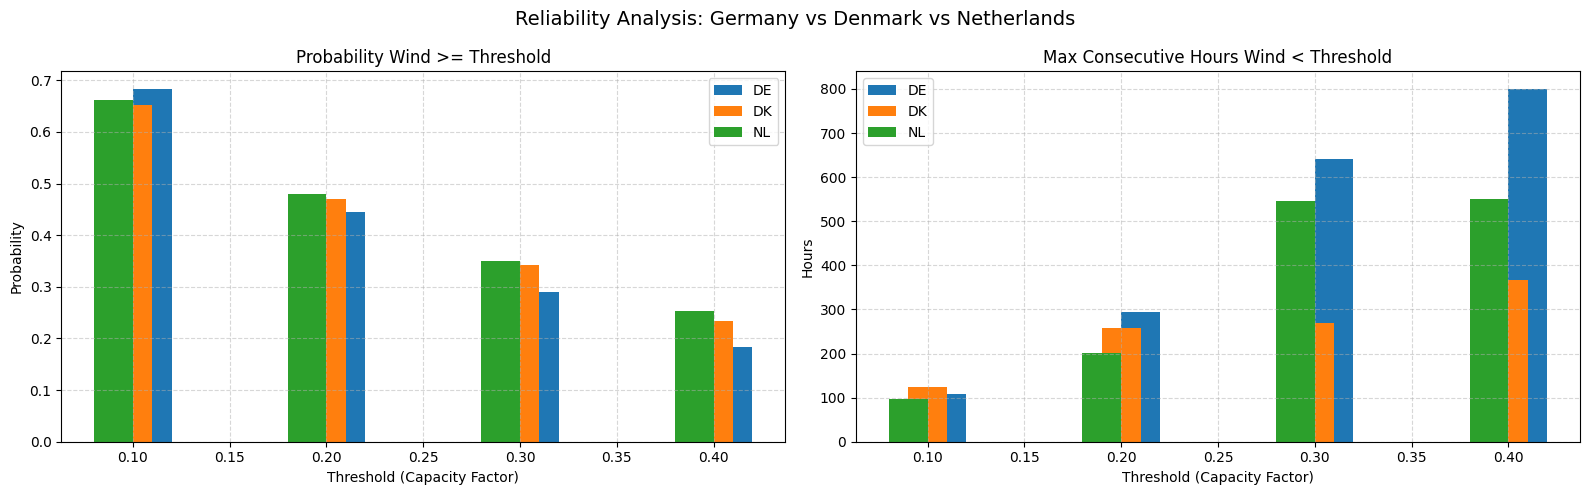

In [ ]:
# ==============================
# Cell XX: Extreme & Reliability Analysis - DE, DK, NL
# ==============================

import pandas as pd
import matplotlib.pyplot as plt

# Thresholds
low_threshold = 0.035
high_threshold = 0.517
reliability_thresholds = [0.1, 0.2, 0.3, 0.4]

# List of countries and their data
countries = {'DE': de_data, 'DK': dk_data, 'NL': nl_data}

# ---------- Extreme Wind Analysis ----------
extreme_wind_summary = {}

for country, data in countries.items():
    # Flags for low/high wind
    data['Low_Wind'] = data[country] <= low_threshold
    data['High_Wind'] = data[country] >= high_threshold

    # Counts
    num_low = data['Low_Wind'].sum()
    num_high = data['High_Wind'].sum()

    # Max consecutive periods
    data['Low_Group'] = (data['Low_Wind'] != data['Low_Wind'].shift()).cumsum()
    low_periods = data.groupby('Low_Group').apply(lambda x: len(x) if x['Low_Wind'].iloc[0] else 0)
    max_low_consec = low_periods[low_periods>0].max() if not low_periods.empty else 0

    data['High_Group'] = (data['High_Wind'] != data['High_Wind'].shift()).cumsum()
    high_periods = data.groupby('High_Group').apply(lambda x: len(x) if x['High_Wind'].iloc[0] else 0)
    max_high_consec = high_periods[high_periods>0].max() if not high_periods.empty else 0

    extreme_wind_summary[country] = {
        "Low_Wind_Hours": num_low,
        "High_Wind_Hours": num_high,
        "Max_Consec_Low": max_low_consec,
        "Max_Consec_High": max_high_consec
    }

# Convert to DataFrame for clean display
extreme_wind_df = pd.DataFrame(extreme_wind_summary).fillna(0).T
print("Extreme Wind Summary (DE, DK, NL):")
print(extreme_wind_df)

# ---------- Reliability Analysis Function ----------
def reliability_analysis(df_column, thresholds=reliability_thresholds):
    total_hours = len(df_column)
    results = []
    for thr in thresholds:
        above = (df_column >= thr).sum()/total_hours
        below = (df_column < thr).sum()/total_hours

        # Max consecutive hours below threshold
        condition = df_column < thr
        groups = (condition != condition.shift()).cumsum()
        consecutive = df_column.groupby(groups).apply(lambda x: len(x) if x.iloc[0]<thr else 0)
        max_consec = consecutive.max() if len(consecutive)>0 else 0

        results.append({
            "Threshold": thr,
            "Probability_Above": above,
            "Probability_Below": below,
            "Max_Consec_Below": max_consec
        })
    return pd.DataFrame(results)

# Compute reliability results for all countries
reliability_results = {}
for country, data in countries.items():
    reliability_results[country] = reliability_analysis(data[country])

# ---------- Combine for plotting ----------
comparison = pd.concat(reliability_results, axis=0).reset_index().rename(columns={
    "level_0": "Country",
    "level_1": "Index"
}).drop(columns="Index")

# ---------- Plotting ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

# Bar plot: Probability Above Threshold
for country, group in comparison.groupby("Country"):
    axes[0].bar(
        group["Threshold"] + (0.01 if country=='DE' else 0.0 if country=='DK' else -0.01),
        group["Probability_Above"],
        width=0.02,
        label=country
    )
axes[0].set_title("Probability Wind >= Threshold")
axes[0].set_xlabel("Threshold (Capacity Factor)")
axes[0].set_ylabel("Probability")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# Bar plot: Max Consecutive Hours Below Threshold
for country, group in comparison.groupby("Country"):
    axes[1].bar(
        group["Threshold"] + (0.01 if country=='DE' else 0.0 if country=='DK' else -0.01),
        group["Max_Consec_Below"],
        width=0.02,
        label=country
    )
axes[1].set_title("Max Consecutive Hours Wind < Threshold")
axes[1].set_xlabel("Threshold (Capacity Factor)")
axes[1].set_ylabel("Hours")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Reliability Analysis: Germany vs Denmark vs Netherlands", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ==============================
# Save All Figures for Germany, Denmark, Netherlands
# ==============================

import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Create folder to store figures ---
fig_folder = "/content/drive/MyDrive/Figures"  # <<< RED: replace with your Google Drive folder path
os.makedirs(fig_folder, exist_ok=True)

# --- 2. Countries and their data ---
countries = {
    "DE": de_data,
    "DK": dk_data,
    "NL": nl_data
}

# --- 3. Reliability thresholds for bar charts ---
reliability_thresholds = [0.1, 0.2, 0.3, 0.4]

for country, data in countries.items():

    # --- Basic Statistics Plots ---
    plt.figure(figsize=(10,5))
    sns.histplot(data[country], bins=50, kde=True, color='skyblue')
    plt.title(f"Histogram of {country} Wind Capacity Factor (Hourly 2024)")
    plt.xlabel("Wind Capacity Factor")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f"{country}_histogram.png"))
    plt.close()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[country], color='lightgreen')
    plt.title(f"Boxplot of {country} Wind Capacity Factor")
    plt.xlabel("Wind Capacity Factor")
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f"{country}_boxplot.png"))
    plt.close()

    # --- Diurnal (Hourly) Pattern ---
    hourly = data[country].groupby(data.index.hour).mean()
    plt.figure(figsize=(10,5))
    plt.plot(hourly.index, hourly.values, marker='o', color='orange')
    plt.title(f"Average Hourly Wind Capacity Factor ({country} 2024)")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Wind Capacity Factor")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f"{country}_hourly.png"))
    plt.close()

    # --- Monthly Pattern ---
    monthly = data[country].resample('ME').mean()
    plt.figure(figsize=(10,5))
    plt.plot(monthly.index, monthly.values, marker='o', color='green')
    plt.title(f"Monthly Average Wind Capacity Factor ({country} 2024)")
    plt.xlabel("Month")
    plt.ylabel("Average Wind Capacity Factor")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f"{country}_monthly.png"))
    plt.close()

    # --- Reliability Bar Chart ---
    prob_above = [(data[country] >= thr).mean() for thr in reliability_thresholds]
    plt.figure(figsize=(10,5))
    plt.bar([str(thr) for thr in reliability_thresholds], prob_above, color='blue')
    plt.title(f"Reliability: P(Wind CF ≥ Threshold) {country}")
    plt.xlabel("CF Threshold")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f"{country}_reliability_bar_chart.png"))
    plt.close()

# --- 4. Germany Specific: Monthly Capacity Factor & Power Output ---
P_rated = 3000  # kW
df = de_data.copy()
df['Power_kW'] = df['DE'] * P_rated

monthly_cf = df['DE'].resample('ME').mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_cf.index, monthly_cf.values, marker='o', color='blue')
plt.title("Monthly Capacity Factor (Germany 2024, DE)")
plt.xlabel("Month")
plt.ylabel("Capacity Factor")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder, "DE_monthly_capacity_factor.png"))
plt.close()

print(f"All figures saved in folder: {fig_folder}")

All figures saved in folder: /content/drive/MyDrive/Figures


In [ ]:
# ==============================
# Save Only Reliability Bar Charts for Germany, Denmark, Netherlands
# ==============================

import os
import matplotlib.pyplot as plt

# --- RED: Replace with your Google Drive folder path ---
fig_folder = "/content/drive/MyDrive/Figures/Reliability"
os.makedirs(fig_folder, exist_ok=True)

# --- Countries and thresholds ---
countries = {
    "DE": de_data,
    "DK": dk_data,
    "NL": nl_data
}
reliability_thresholds = [0.1, 0.2, 0.3, 0.4]

# --- Loop through countries and save bar charts ---
for country, data in countries.items():
    prob_above = [(data[country] >= thr).mean() for thr in reliability_thresholds]

    plt.figure(figsize=(10,5))
    plt.bar([str(thr) for thr in reliability_thresholds], prob_above, color='blue')
    plt.title(f"Reliability: P(Wind CF ≥ Threshold) {country}")
    plt.xlabel("Capacity Factor Threshold")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.tight_layout()

    # Save figure
    plt.savefig(os.path.join(fig_folder, f"{country}_reliability_bar_chart.png"))
    plt.close()

print(f"All reliability bar charts saved in: {fig_folder}")

All reliability bar charts saved in: /content/drive/MyDrive/Figures/Reliability
